<a href="https://colab.research.google.com/github/ankitoscar/handsonml/blob/main/chapter_11/exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training Deep Neural Networks using Keras
This chapter involves different training, intitialization and normalization strategies used for enhancing the performance of a neural network in keras. 

## Exercises

### Deep Learning

#### Build a DNN with five hidden layers of 100 neurons each, He initialization, and the ELU activation function.

In [1]:
#  importing essential libraries 
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Loading the MNIST digits dataset 
from keras.datasets import mnist 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# Seeing shape of the dataset 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


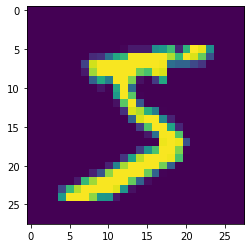

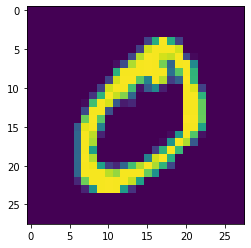

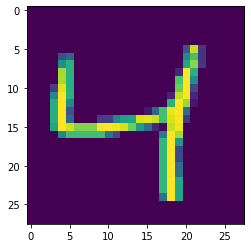

In [4]:
# Printing first 10 images in the training dataset 
for image in X_train[:3]:
  plt.figure()
  plt.imshow(image)
  plt.show()

In [5]:
# Seeing the first 5 elements of the training dataset
X_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [6]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

The DNN which we are going to make is having 5 layers, with 100 neurons each, He initialization and ELU activation function.

In [7]:
# Making the network architecture
model = keras.models.Sequential([
              keras.layers.Flatten(input_shape=[28,28]),  
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 5

In [8]:
# Seperating the dataset between 0-4 and 5-9 
train04_filter = np.isin(y_train, [0, 1, 2, 3, 4])
train59_filter = np.isin(y_train, [5, 6, 7, 8, 9])

test04_filter = np.isin(y_test, [0, 1, 2, 3, 4])
test59_filter = np.isin(y_test, [5, 6, 7, 8, 9])

In [9]:
# Splitting the data 
X_train04, y_train04, X_test04, y_test04 =  X_train[train04_filter], y_train[train04_filter], X_test[test04_filter], y_test[test04_filter]
X_train59, y_train59, X_test59, y_test59 =  X_train[train59_filter], y_train[train59_filter], X_test[test59_filter], y_test[test59_filter]


In [10]:
print(X_train.shape)
print(X_train04.shape)
print(X_train59.shape)

(60000, 28, 28)
(30596, 28, 28)
(29404, 28, 28)


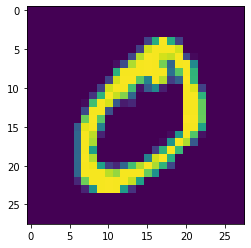

In [11]:
# Seeing a sample from each dataset 
plt.figure()
plt.imshow(X_train04[0])
plt.show()

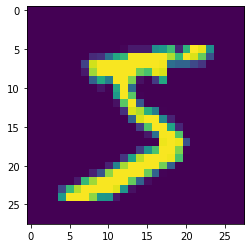

In [12]:
plt.figure()
plt.imshow(X_train59[0])
plt.show()

In [13]:
# Training the model 

# Making callbacks 
checkpoints_cb = keras.callbacks.ModelCheckpoint('my_model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)

# Compiling the model 
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

# Training the model 
history = model.fit(X_train04, y_train04, epochs=100,
                    validation_split=0.15, callbacks = [checkpoints_cb, early_stopping_cb])

Epoch 1/100
813/813 [==============================] - 4s 4ms/step - loss: 5.8112 - val_loss: 0.3315
Epoch 2/100
813/813 [==============================] - 3s 3ms/step - loss: 0.3243 - val_loss: 0.1521
Epoch 3/100
813/813 [==============================] - 3s 3ms/step - loss: 0.1956 - val_loss: 0.1336
Epoch 4/100
813/813 [==============================] - 3s 3ms/step - loss: 0.1136 - val_loss: 0.0888
Epoch 5/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0828 - val_loss: 0.0846
Epoch 6/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0818 - val_loss: 0.1095
Epoch 7/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0651 - val_loss: 0.0551
Epoch 8/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0532 - val_loss: 0.0778
Epoch 9/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0527 - val_loss: 0.0620
Epoch 10/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0553 - val_lo

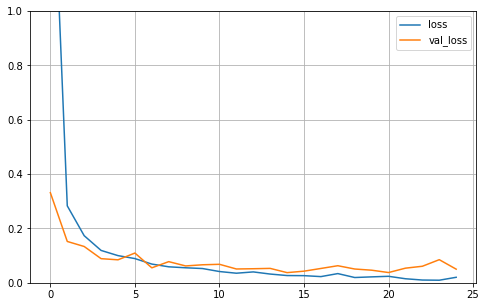

In [14]:
# Seeing learning curve 
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [15]:
# Evaluating the model 
model.evaluate(X_test04, y_test04)

161/161 [==============================] - 0s 1ms/step - loss: 0.0549


0.0549297034740448

In [16]:
# Adding batch normalization and repeating the process 

# Making the network architecture
model = keras.models.Sequential([
              keras.layers.Flatten(input_shape=[28,28]),
              keras.layers.BatchNormalization(),  
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.BatchNormalization(),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.BatchNormalization(),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.BatchNormalization(),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.BatchNormalization(),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_8 (Dense)              (None, 100)              

In [17]:
# Making callbacks 
checkpoints_cb = keras.callbacks.ModelCheckpoint('my_model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)

# Compiling the model 
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

# Training the model 
history = model.fit(X_train04, y_train04, epochs=100,
                    validation_split=0.15, callbacks = [checkpoints_cb, early_stopping_cb])

Epoch 1/100
813/813 [==============================] - 7s 6ms/step - loss: 0.2184 - val_loss: 0.1226
Epoch 2/100
813/813 [==============================] - 4s 5ms/step - loss: 0.0658 - val_loss: 0.0747
Epoch 3/100
813/813 [==============================] - 4s 6ms/step - loss: 0.0520 - val_loss: 0.0676
Epoch 4/100
813/813 [==============================] - 4s 6ms/step - loss: 0.0431 - val_loss: 0.1216
Epoch 5/100
813/813 [==============================] - 4s 5ms/step - loss: 0.0366 - val_loss: 0.1127
Epoch 6/100
813/813 [==============================] - 5s 6ms/step - loss: 0.0277 - val_loss: 0.0917
Epoch 7/100
813/813 [==============================] - 5s 6ms/step - loss: 0.0344 - val_loss: 0.0946
Epoch 8/100
813/813 [==============================] - 4s 5ms/step - loss: 0.0220 - val_loss: 0.0950
Epoch 9/100
813/813 [==============================] - 4s 6ms/step - loss: 0.0152 - val_loss: 0.1388
Epoch 10/100
813/813 [==============================] - 4s 5ms/step - loss: 0.0190 - val_lo

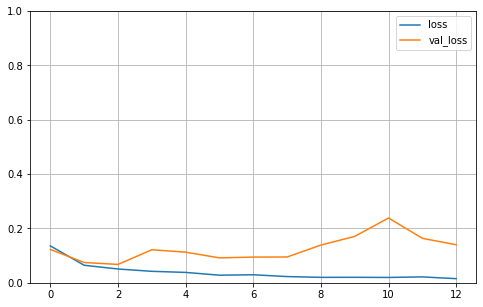

In [18]:
# Seeing learning curve 
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
# Evaluating model on test data 
model.evaluate(X_test04, y_test04)

161/161 [==============================] - 0s 1ms/step - loss: 0.1683


0.16826006770133972

The model has in turn performed worse than the previous iteration, it has most probably overfitted.

In [20]:
# Creating a new model with dropout before every layer

# Making the network architecture
model = keras.models.Sequential([
              keras.layers.Flatten(input_shape=[28,28]),
              keras.layers.Dropout(rate=0.2),  
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dropout(rate=0.2),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dropout(rate=0.2),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dropout(rate=0.2),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dropout(rate=0.2),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)              

In [21]:
# Making callbacks 
checkpoints_cb = keras.callbacks.ModelCheckpoint('my_model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)

# Compiling the model 
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

# Training the model 
history = model.fit(X_train04, y_train04, epochs=100,
                    validation_split=0.15, callbacks = [checkpoints_cb, early_stopping_cb])

Epoch 1/100
813/813 [==============================] - 4s 4ms/step - loss: 19.7226 - val_loss: 0.2920
Epoch 2/100
813/813 [==============================] - 3s 4ms/step - loss: 0.7252 - val_loss: 0.2203
Epoch 3/100
813/813 [==============================] - 3s 4ms/step - loss: 0.4690 - val_loss: 0.1635
Epoch 4/100
813/813 [==============================] - 3s 4ms/step - loss: 0.3630 - val_loss: 0.1548
Epoch 5/100
813/813 [==============================] - 3s 4ms/step - loss: 0.3263 - val_loss: 0.1523
Epoch 6/100
813/813 [==============================] - 3s 4ms/step - loss: 0.2690 - val_loss: 0.1065
Epoch 7/100
813/813 [==============================] - 3s 4ms/step - loss: 0.2309 - val_loss: 0.1032
Epoch 8/100
813/813 [==============================] - 3s 4ms/step - loss: 0.2335 - val_loss: 0.0940
Epoch 9/100
813/813 [==============================] - 3s 4ms/step - loss: 0.1925 - val_loss: 0.0756
Epoch 10/100
813/813 [==============================] - 3s 4ms/step - loss: 0.1620 - val_l

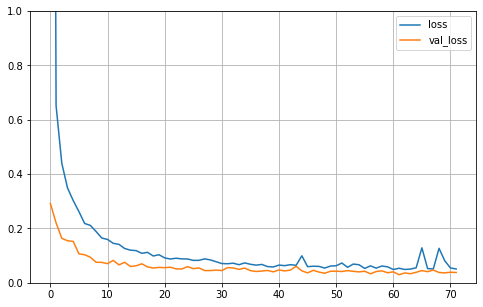

In [22]:
# Seeing learning curve 
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
# Evaluating the model 
model.evaluate(X_test04, y_test04)

161/161 [==============================] - 0s 1ms/step - loss: 0.0408


0.04081333428621292

#### Conclusion
Dropout turned out to be more efficient in improving the model's performance in this case as compared to batch normalization.

#### Create a new DNN reusing all the pretrained layers of the previous model, freeeze them, and replace the softmax output layer with a new one. Train this new DNN digits 5-9 and see the results.

In [33]:
# Loading the pretrained model
model_old = keras.models.load_model('my_model.h5')

# Copying pretrained layers
model_new = keras.models.Sequential(model_old.layers[:-1])
model_new.add(keras.layers.Dense(5, activation='softmax'))

# Cloning old model 
model_old_clone = keras.models.clone_model(model_old)
model_old_clone.set_weights(model_old.get_weights())

# Freezing the pretrained layers 
for layer in model_new.layers[:-1]:
  layer.trainable = False

# Compiling the new model and seeing its summary 
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')
model_new.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)              

In [34]:
# Subtracting 5 from the y_train59 
y_train59 = y_train59 - 5

In [35]:
# Training the newly loaded model for classify digits 5-9

# Callbacks
checkpoints_cb = keras.callbacks.ModelCheckpoint('my_new_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=100)

# Training 
history = model_new.fit(X_train59, y_train59, epochs=100,
                        validation_split=0.15, callbacks=[checkpoints_cb, early_stopping_cb])

Epoch 1/100
782/782 [==============================] - 3s 3ms/step - loss: 5.5903 - val_loss: 1.1952
Epoch 2/100
782/782 [==============================] - 2s 3ms/step - loss: 1.4817 - val_loss: 1.2036
Epoch 3/100
782/782 [==============================] - 2s 2ms/step - loss: 1.3592 - val_loss: 1.2557
Epoch 4/100
782/782 [==============================] - 2s 3ms/step - loss: 1.4062 - val_loss: 1.1913
Epoch 5/100
782/782 [==============================] - 2s 3ms/step - loss: 1.3434 - val_loss: 1.1944
Epoch 6/100
782/782 [==============================] - 2s 3ms/step - loss: 1.3169 - val_loss: 1.2217
Epoch 7/100
782/782 [==============================] - 2s 3ms/step - loss: 1.3231 - val_loss: 1.1871
Epoch 8/100
782/782 [==============================] - 2s 3ms/step - loss: 1.2978 - val_loss: 1.1953
Epoch 9/100
782/782 [==============================] - 2s 3ms/step - loss: 1.3073 - val_loss: 1.1913
Epoch 10/100
782/782 [==============================] - 2s 3ms/step - loss: 1.2998 - val_lo

In [36]:
# Evaluating the model on test data 
y_test59 = y_test59 - 5

In [38]:
model_new.evaluate(X_test59, y_test59)

152/152 [==============================] - 0s 1ms/step - loss: 1.1835


1.1834678649902344

152/152 [==============================] - 0s 1ms/step - loss: 1.1835


1.1834678649902344